# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [2]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [3]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**

In [4]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary =  df.isnull().sum() # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (missing_summary / len(df)) * 100  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame({
        'Valores Faltantes': missing_summary,
        '% Faltantes': missing_percent.round(2)
    })
    missing_info = missing_info[missing_info['Valores Faltantes'] > 0].sort_values(by='% Faltantes', ascending=False)
    return missing_info

In [5]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,Valores Faltantes,% Faltantes
estadoTran,4331,95.08
estado,2622,57.56
Terreno,1728,37.94
Area Construcción,1259,27.64
tipoTran,3,0.07
Total M²,1,0.02


In [6]:
def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes
    plt.figure(figsize=(12,6))

    # ✅ TODO: Graficar un mapa de calor de los valores faltantes
    sns.heatmap(df.isnull(),
                cmap='YlOrBr',
                cbar=False,
                yticklabels=False)
    plt.title("Mapa de calor de valores faltantes", fontsize=14)
    plt.xlabel("Columnas del dataset")
    plt.ylabel("Filas del dataset")
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


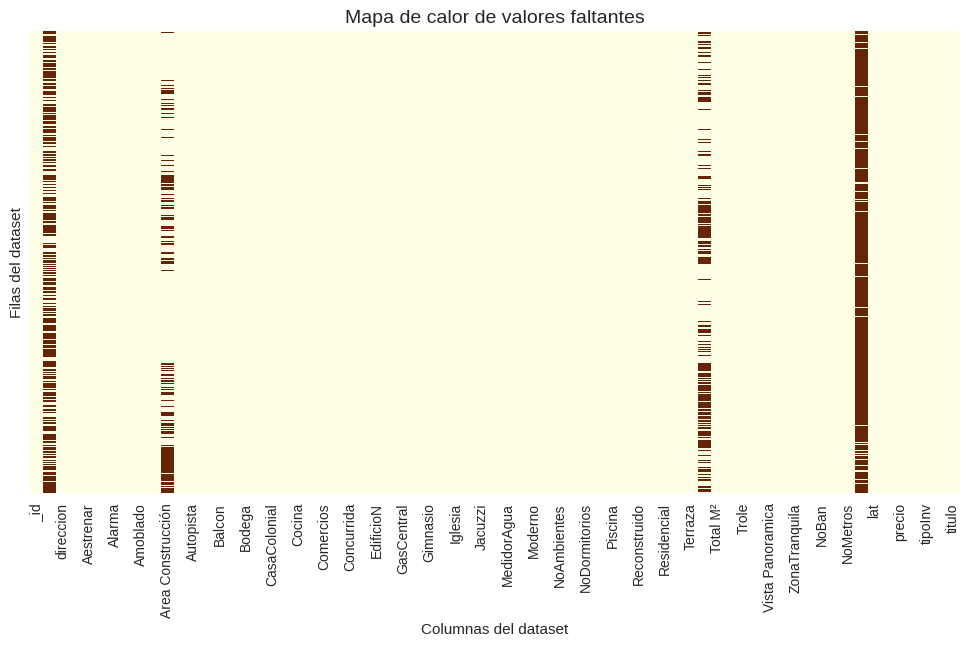

In [8]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(df)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué columnas tienen el mayor porcentaje de valores faltantes?

Respuesta: _id, Area Construcción, Total M2,

¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

Respuesta: Los valores faltantes no parecen distribuidos aleatoriamente; se agrupan por área específica. También, se observa segmentos donde varias columnas tienen registros vacíos, por lo que se deduce que algunos registros pueden estar parcialmente incompletos

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.

Respuesta: Se observa correlación entre los faltantes de Terreno, Área Construcción y total M2, lo que indica que cuando falta uno, frecuentemente falta el otro, es decir, la falta de un dato puede depender de otra variable observable.

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [9]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numericas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()  # ← COMPLETAR
    print(correlation_matrix)

    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()



🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

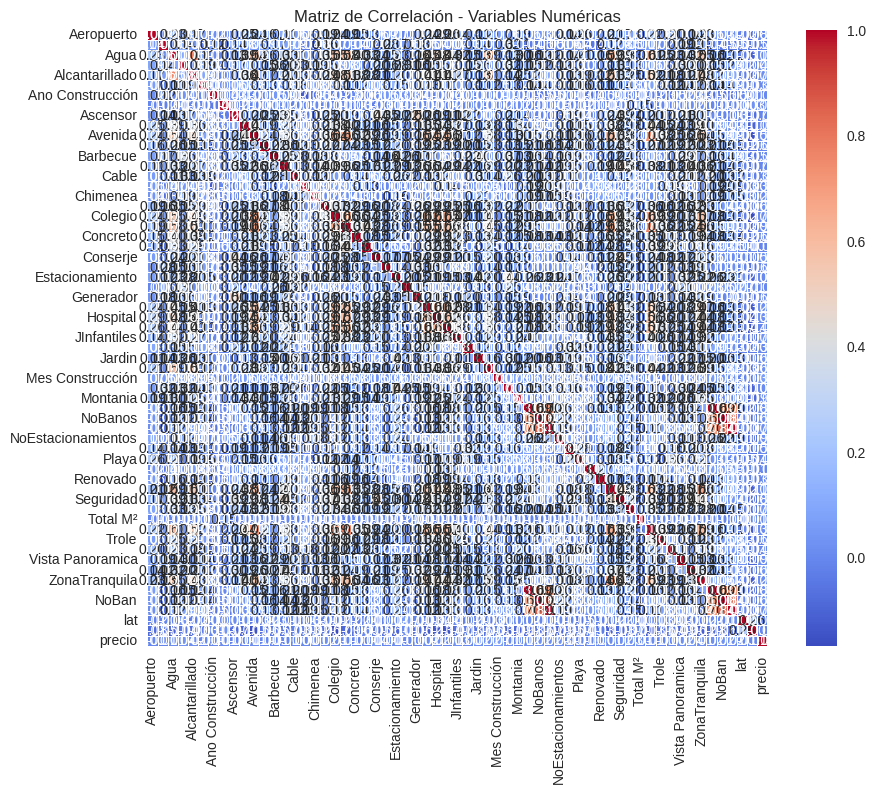

In [11]:
#Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuerdo a las relaciones que identifico previamente

Preguntas para el Análisis:

¿Los valores faltantes son MCAR, MAR o MNAR?

El análisis multivariable evidenció que los valores faltantes del dataset Remax no son completamente aleatorios, sino que presentan dependencias claras entre variables de infraestructura y confort, cabe recalcar que la mayoría corresponde a faltantes de tipo MAR

¿Qué variables podrían predecir la presencia de valores faltantes?

Agua y Alcantarillado: predicen servicios básicos.

Aestrenar y Año Construcción: predicen falta de datos en antigüedad.

NoBan, NoDorm, Total M2: predicen Precio.

ZonaTranquila, Seguridad, Ascensor: predicen Amoblado o tipo de zona.

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [15]:
import pandas as pd

def imputar_valores_faltantes(df):

    df_imputado = df.copy()

    # Eliminar columna con más del 90% de faltantes
    if 'estadoTran' in df_imputado.columns:
        df_imputado.drop(columns=['estadoTran'], inplace=True)
        print("🗑️ Columna 'estadoTran' eliminada (demasiados nulos)")

    # Imputar 'estado' con moda
    if 'estado' in df_imputado.columns:
        moda_estado = df_imputado['estado'].mode()[0]
        df_imputado.loc[:, 'estado'] = df_imputado['estado'].fillna(moda_estado)
        print(f"✅ Columna 'estado' imputada con la moda: {moda_estado}")

    # Asegurar que las columnas numéricas sean realmente numéricas
    columnas_numericas = ['Terreno', 'Area Construcción', 'Total M²']
    for col in columnas_numericas:
        if col in df_imputado.columns:
            df_imputado[col] = (
                df_imputado[col]
                .astype(str)
                .str.replace(',', '', regex=False)
                .replace('nan', pd.NA)
            )
            df_imputado[col] = pd.to_numeric(df_imputado[col], errors='coerce')

    # Imputar con mediana
    for col in columnas_numericas:
        if col in df_imputado.columns:
            mediana = df_imputado[col].median()
            df_imputado.loc[:, col] = df_imputado[col].fillna(mediana)
            print(f"✅ Columna '{col}' imputada con mediana: {mediana:.2f}")

    # Imputar tipoTran (pocos nulos)
    if 'tipoTran' in df_imputado.columns:
        moda_tipo = df_imputado['tipoTran'].mode()[0]
        df_imputado.loc[:, 'tipoTran'] = df_imputado['tipoTran'].fillna(moda_tipo)
        print(f"✅ Columna 'tipoTran' imputada con la moda: {moda_tipo}")

    print("\n🎯 Imputación completada correctamente.")
    return df_imputado

In [16]:
df_imputado = imputar_valores_faltantes(df)

🗑️ Columna 'estadoTran' eliminada (demasiados nulos)
✅ Columna 'estado' imputada con la moda: Usada
✅ Columna 'Terreno' imputada con mediana: 234.00
✅ Columna 'Area Construcción' imputada con mediana: 158.69
✅ Columna 'Total M²' imputada con mediana: 200.00
✅ Columna 'tipoTran' imputada con la moda: De Venta

🎯 Imputación completada correctamente.


In [17]:
print("\n📊 Valores faltantes después de imputación:")
print(df_imputado.isnull().sum()[df_imputado.isnull().sum() > 0])


📊 Valores faltantes después de imputación:
Series([], dtype: int64)


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [22]:
from scipy.stats import chi2_contingency

def chi_cuadrado(df, col1, col2):
    tabla = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(tabla)
    print(f"\n📊 Tabla de contingencia entre '{col1}' y '{col2}':\n")
    print(tabla)
    print("\n🔍 RESULTADOS CHI-CUADRADO")
    print(f"Estadístico χ²: {chi2:.4f}")
    print(f"Grados de libertad: {dof}")
    print(f"Valor p: {p:.4f}")
    if p < 0.05:
        print("✅ Existe una relación significativa entre las variables (p < 0.05)")
    else:
        print("❌ No hay evidencia suficiente de relación significativa (p ≥ 0.05)")

# Ejecutar entre las dos variables más relevantes
chi_cuadrado(df, 'estado', 'tipoInv')


📊 Tabla de contingencia entre 'estado' y 'tipoInv':

tipoInv                      Casa  Departamento  Inversión  Quinta  Terreno
estado                                                                     
En Construcción / En Planos    33            26          2       1       16
PROBABLE                        1             2          0       0        1
Por Estrenar                  137           216          9       3      126
RESERVADA                      13            12          0       0        8
Reconstruida/ Renovada         75            55          3       0        3
Usada                         650           392         31      18       36
VENDIDA                        17            13          0       1       33

🔍 RESULTADOS CHI-CUADRADO
Estadístico χ²: 357.7715
Grados de libertad: 24
Valor p: 0.0000
✅ Existe una relación significativa entre las variables (p < 0.05)


# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [23]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
cat_cols = df.select_dtypes(include='object').columns

# columnas categóricas con valores faltantes
faltantes_cat = df[cat_cols].isnull().sum()
faltantes_cat = faltantes_cat[faltantes_cat > 0]
print("📋 Columnas categóricas con valores faltantes:")
print(faltantes_cat)


📋 Columnas categóricas con valores faltantes:
estado        2622
Terreno       1728
estadoTran    4331
tipoTran         3
dtype: int64


In [25]:
def imputar_categoricas(df):
    df_imputado = df.copy()

    if 'estadoTran' in df_imputado.columns:
        df_imputado.drop(columns=['estadoTran'], inplace=True)
        print("🗑️ Columna 'estadoTran' eliminada (demasiados nulos)")

    if 'estado' in df_imputado.columns:
        moda_estado = df_imputado['estado'].mode()[0]
        df_imputado['estado'] = df_imputado['estado'].fillna(moda_estado)
        print(f"✅ Columna 'estado' imputada con la moda: {moda_estado}")

    if 'Terreno' in df_imputado.columns:
        if df_imputado['Terreno'].dtype == 'object':
            df_imputado['Terreno'] = df_imputado['Terreno'].fillna('Desconocido')
            print("🟨 Columna 'Terreno' imputada con 'Desconocido'")
        else:
            mediana_terreno = df_imputado['Terreno'].median()
            df_imputado['Terreno'] = df_imputado['Terreno'].fillna(mediana_terreno)
            print(f"✅ Columna 'Terreno' imputada con la mediana: {mediana_terreno}")

    if 'tipoTran' in df_imputado.columns:
        moda_tipoTran = df_imputado['tipoTran'].mode()[0]
        df_imputado['tipoTran'] = df_imputado['tipoTran'].fillna(moda_tipoTran)
        print(f"✅ Columna 'tipoTran' imputada con la moda: {moda_tipoTran}")

    if 'Area Construcción' in df_imputado.columns:
        mediana_area = df_imputado['Area Construcción'].median()
        df_imputado['Area Construcción'] = df_imputado['Area Construcción'].fillna(mediana_area)
        print(f"✅ Columna 'Area Construcción' imputada con la mediana: {mediana_area:.2f}")

    if 'Total M²' in df_imputado.columns:
        media_total = df_imputado['Total M²'].mean()
        df_imputado['Total M²'] = df_imputado['Total M²'].fillna(media_total)
        print(f"✅ Columna 'Total M²' imputada con la media: {media_total:.2f}")

    faltantes_restantes = df_imputado.isnull().sum()
    faltantes_restantes = faltantes_restantes[faltantes_restantes > 0]
    print("\n📊 Valores faltantes después de imputación:")
    print(faltantes_restantes if not faltantes_restantes.empty else "✅ No quedan valores faltantes.")

    return df_imputado

df_imputado_cat = imputar_categoricas(df)

🗑️ Columna 'estadoTran' eliminada (demasiados nulos)
✅ Columna 'estado' imputada con la moda: Usada
🟨 Columna 'Terreno' imputada con 'Desconocido'
✅ Columna 'tipoTran' imputada con la moda: De Venta
✅ Columna 'Area Construcción' imputada con la mediana: 158.69
✅ Columna 'Total M²' imputada con la media: 413107.81

📊 Valores faltantes después de imputación:
✅ No quedan valores faltantes.


# ✅ **RESULTADOS:**
¿Qué columnas presentaron mayores desafíos para la imputación?

Respuesta:  Las columnas que presentaron mayor problema fue: "estadoTran", ya que, presentó alrededor de un 95% de valores faltantes, lo que imposibilitó realizar una imputación confiable. Además, "Terreno" contenía valores faltantes y datos con formato inconsistente, lo cual dificultó aplicar métodos estadísticos directos. Se optó por imputar con la categoría “Desconocido” para mantener la coherencia del dataset.

¿En qué casos consideraron que la eliminación era mejor que la imputación?

Respuesta: La eliminación fue la mejor opción en el caso de la columna "estadoTran", debido a que tenía más del 90% de valores faltantes, decidí ir por la eliminación ya que preserva la calidad analítica del resto de las variables

¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?

Respuesta: Dependiendo del tipo de valor faltante se debe considerar diferentes cosas, por ejemplo: si los datos son MCAR, se debe imputar.
Si son MAR, se debe imputar de forma condicional, considerando otras variables.
Si son MNAR, no se deben imputar, porque la falta del dato tiene sentido propio y sustituirlo distorsionaría la información. Es por ello, que se debe tener en cuenta todas estas consideraciones para no optar por una elección incorrecta y así evitar sesgar el análisis.


# 🚀 ¡TALLER FINALIZADO!"